In [16]:
from matplotlib.pyplot import cm
import numpy as np
import osmnx as ox
import networkx as nx
from shapely.geometry import MultiLineString

In [3]:
# Download the road network
G = ox.graph_from_place('Bremen, Germany', network_type='drive')

In [6]:
# Starting and ending point of a trip
start = [8.185539352132764,38.606855578588329]
end = [53.17993104063168,20.64882960212567]

In [9]:
# Retrieve nearest node
nodes = ox.nearest_nodes(G, start, end)

In [56]:
# Compute the path of the trip
route = nx.shortest_path(G, nodes[0], nodes[1], weight='length')

In [73]:
length = nx.shortest_path_length(G, nodes[0], nodes[1], weight='length')
print(length)

41503.817


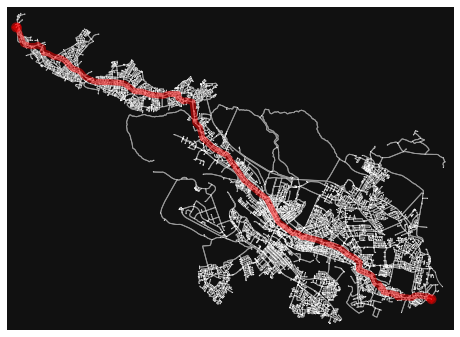

In [21]:
# Plot the trip
rc = 'r'
fig, ax = ox.plot_graph_route(G,
                              route,route_color=rc,edge_linewidth=1,
                              node_size=1,
                              route_linewidth=6)

In [44]:
route_pairwise = zip(route[:-1], route[1:])

In [43]:
print(list(route_pairwise))

[]


In [49]:
edges = ox.graph_to_gdfs(G, nodes=False).sort_index()

In [63]:
edges

osmid  \
u           v           key                                                      
125801      21725102    0                        [4815353, 4422762, 942826243]   
            30211999    0             [242641826, 4296826, 28981476, 28985342]   
125815      29856319    0    [108270272, 303887036, 108273221, 108273225, 3...   
20958816    21107574    0                                [230371048, 30594609]   
            21108148    0                                 [976390100, 3999575]   
...                                                                        ...   
10002567116 10002567116 0                                           1092162762   
                        1                                           1092162762   
10002586214 281435891   0                                             71459486   
            10002586214 0                                           1092167826   
10017932526 2195502711  0                              [147698329, 1093781156]   

                             oneway   lanes          ref  \
u           v           key                                
125801      21725102    0      True  [1, 2]          B 6   
            30211999    0      True       2  [B 75, B 6]   
125815      29856319    0      True  [3, 2]         B 75   
20958816    21107574    0      True     NaN          NaN   
            21108148    0     False     NaN          NaN   
...                             ...     ...          ...   
10002567116 10002567116 0     False     NaN          NaN   
                        1     False     NaN          NaN   
10002586214 281435891   0     False     NaN          NaN   
            10002586214 0      True     NaN          NaN   
10017932526 2195502711  0     False     NaN          NaN   

                                              name        highway  maxspeed  \
u           v           key                                                   
125801      21725102    0                      NaN     trunk_link  [60, 50]   
            30211999    0       Oldenburger Straße          trunk        60   
125815      29856319    0       Oldenburger Straße          trunk        70   
20958816    21107574    0         Leher Heerstraße      secondary        50   
            21108148    0                Luisental    residential        30   
...                                            ...            ...       ...   
10002567116 10002567116 0       Merseburger Straße    residential        30   
                        1       Merseburger Straße    residential        30   
10002586214 281435891   0    Senator-Bömers-Straße   unclassified        50   
            10002586214 0    Senator-Bömers-Straße   unclassified        50   
10017932526 2195502711  0                 Ottenhof  living_street       NaN   

                                  reversed    length bridge  \
u           v           key                                   
125801      21725102    0            False   272.766    NaN   
            30211999    0            False   541.229    yes   
125815      29856319    0            False  1303.683    yes   
20958816    21107574    0            False   138.883    NaN   
            21108148    0            False   258.001    NaN   
...                                    ...       ...    ...   
10002567116 10002567116 0            False    32.352    NaN   
                        1             True    32.352    NaN   
10002586214 281435891   0             True   193.749    NaN   
            10002586214 0            False    69.673    NaN   
10017932526 2195502711  0    [False, True]    82.389    NaN   

                                                                      geometry  \
u           v           key                                                      
125801      21725102    0    LINESTRING (8.78199 53.07068, 8.78171 53.07060...   
            30211999    0    LINESTRING (8.78199 53.07068, 8.78178 53.07055...   
125815      29856319    0    LINESTRING (8.73681 

In [52]:
edges[['osmid','length']]

osmid  \
u           v           key                                                      
125801      21725102    0                        [4815353, 4422762, 942826243]   
            30211999    0             [242641826, 4296826, 28981476, 28985342]   
125815      29856319    0    [108270272, 303887036, 108273221, 108273225, 3...   
20958816    21107574    0                                [230371048, 30594609]   
            21108148    0                                 [976390100, 3999575]   
...                                                                        ...   
10002567116 10002567116 0                                           1092162762   
                        1                                           1092162762   
10002586214 281435891   0                                             71459486   
            10002586214 0                                           1092167826   
10017932526 2195502711  0                              [147698329, 1093781156]   

                               length  
u           v           key            
125801      21725102    0     272.766  
            30211999    0     541.229  
125815      29856319    0    1303.683  
20958816    21107574    0     138.883  
            21108148    0     258.001  
...                               ...  
10002567116 10002567116 0      32.352  
                        1      32.352  
10002586214 281435891   0     193.749  
            10002586214 0      69.673  
10017932526 2195502711  0      82.389  

[20204 rows x 2 columns]

In [64]:
line = [edges.loc[uv, 'geometry'].iloc[0] for uv in route_pairwise]

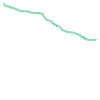

In [65]:
MultiLineString(line)

In [61]:
edges[['length']].sum(axis=0)

length    2915431.216
dtype: float64

In [68]:
line_length = [edges.loc[uv, 'length'].iloc[0] for uv in route_pairwise]
line_length

[]